# Analyze Weather Data usecase with Azure Maps

https://azure.microsoft.com/en-us/products/azure-maps/?msockid=2e39c66c693c66a5151fd200687567d0

https://learn.microsoft.com/en-us/azure/azure-maps/

In [1]:
import aiohttp
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys

from dotenv import load_dotenv
from IPython.display import Image, display

In [2]:
load_dotenv("azure.env")

subscription_key = os.getenv('AZURE_MAPS_KEY')

In [3]:
sys.version

'3.10.14 (main, May  6 2024, 19:42:50) [GCC 11.2.0]'

## Dataset

In [4]:
DATASET_DIR = 'data'
os.makedirs(DATASET_DIR, exist_ok=True)

data_file = os.path.join(DATASET_DIR, "weather_dataset_demo.csv")

In [5]:
!wget https://raw.githubusercontent.com/Azure-Samples/Azure-Maps-Jupyter-Notebook/refs/heads/master/AzureMapsJupyterSamples/Tutorials/Analyze%20Weather%20Data/data/weather_dataset_demo.csv -O $data_file

--2025-09-01 08:19:12--  https://raw.githubusercontent.com/Azure-Samples/Azure-Maps-Jupyter-Notebook/refs/heads/master/AzureMapsJupyterSamples/Tutorials/Analyze%20Weather%20Data/data/weather_dataset_demo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8399 (8.2K) [text/plain]
Saving to: ‘data/weather_dataset_demo.csv’

data/weather_datase 100%[===================>]   8.20K  --.-KB/s    in 0s      

2025-09-01 08:19:12 (66.6 MB/s) - ‘data/weather_dataset_demo.csv’ saved [8399/8399]



In [6]:
!ls $data_file -lh

-rwxrwxrwx 1 root root 8.3K Sep  1 08:19 data/weather_dataset_demo.csv


In [7]:
df = pd.read_csv(data_file)
df

,StationID,latitude,longitude,Year,Month,Day,DryBulbCelsius,WetBulbFarenheit,WetBulbCelsius,DewPointFarenheit,DewPointCelsius,RelativeHumidity,WindSpeed,WindDirection
0,10397,47.149757,-120.805769,2019,11,9,14.0,56,13.2,55,13.0,93,6,230
1,10397,47.149757,-120.805769,2019,11,10,12.2,47,8.4,40,4.4,59,7,320
2,10397,47.149757,-120.805769,2019,11,11,10.6,40,4.5,25,-3.9,36,8,340
3,10397,47.149757,-120.805769,2019,11,12,8.3,46,7.5,44,6.7,89,15,80
4,10397,47.149757,-120.805769,2019,11,13,4.4,39,3.9,38,3.3,93,8,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10299,46.449299,-119.382765,2019,12,4,-1.7,24,-4.5,12,-11.1,49,21,350
116,10299,46.449299,-119.382765,2019,12,5,-0.6,27,-2.9,18,-7.8,59,9,340
117,10299,46.449299,-119.382765,2019,12,6,-1.1,25,-4.1,12,-11.1,47,13,340
118,10299,46.449299,-119.382765,2019,12,7,0.6,27,-2.5,16,-8.9,50,7,330


In [8]:
df.describe()

,StationID,latitude,longitude,Year,Month,Day,DryBulbCelsius,WetBulbFarenheit,WetBulbCelsius,DewPointFarenheit,DewPointCelsius,RelativeHumidity,WindSpeed,WindDirection
count,120.000000,120.000000,120.000000,120.0,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,10387.250000,46.449517,-119.702912,2019.0,11.266667,15.500000,7.635833,38.175000,3.37500,26.891667,-2.839167,52.858333,7.216667,194.083333
std,210.119264,0.486973,1.113670,0.0,0.444071,8.691733,7.548463,11.946423,6.59139,15.858511,8.814859,21.420282,4.556247,122.567051
min,10140.000000,45.779105,-120.805769,2019.0,11.000000,1.000000,-9.400000,12.000000,-11.30000,-7.000000,-21.700000,10.000000,0.000000,0.000000
25%,10259.250000,46.259707,-120.647712,2019.0,11.000000,8.000000,2.200000,29.750000,-1.32500,16.000000,-8.900000,40.500000,5.000000,100.000000
50%,10348.000000,46.434603,-119.988896,2019.0,11.000000,15.500000,8.900000,39.500000,4.10000,25.000000,-3.900000,52.500000,7.000000,185.000000
75%,10476.000000,46.624413,-119.044095,2019.0,12.000000,23.000000,13.925000,44.000000,6.65000,36.000000,2.200000,67.000000,9.000000,320.000000
max,10713.000000,47.149757,-118.028086,2019.0,12.000000,30.000000,21.700000,64.000000,17.50000,61.000000,16.100000,96.000000,21.000000,360.000000


In [9]:
df.dtypes

StationID              int64
latitude             float64
longitude            float64
Year                   int64
Month                  int64
Day                    int64
DryBulbCelsius       float64
WetBulbFarenheit       int64
WetBulbCelsius       float64
DewPointFarenheit      int64
DewPointCelsius      float64
RelativeHumidity       int64
WindSpeed              int64
WindDirection          int64
dtype: object

In [10]:
coords = pd.unique(df[['latitude', 'longitude']].values.ravel())
station_ids = pd.unique(df[['StationID']].values.ravel())

years, months, days = [], [], []
dates_check = set()
wind_speeds, wind_direction = [], []

# Call azure maps weather service to get daily forcast data
session = aiohttp.ClientSession()

j = -1

for i in range(0, len(coords), 2):
    wind_speeds.append([])
    wind_direction.append([])
    query = str(coords[i])+', '+str(coords[i+1])
    forecast_response = await(await session.get("https://atlas.microsoft.com/weather/forecast/daily/json?query={}&api-version=1.0&subscription-key={}&duration=15".format(query, subscription_key))).json()
    j += 1
    for day in range(len(forecast_response['forecasts'])):
        date = forecast_response['forecasts'][day]['date'][:10]
        wind_speeds[j].append(forecast_response['forecasts']
                              [day]['day']['wind']['speed']['value'])
        wind_direction[j].append(
            forecast_response['forecasts'][day]['day']['windGust']['direction']['degrees'])

        if date not in dates_check:
            year, month, day = date.split('-')
            years.append(year)
            months.append(month)
            days.append(day)
            dates_check.add(date)

await session.close()

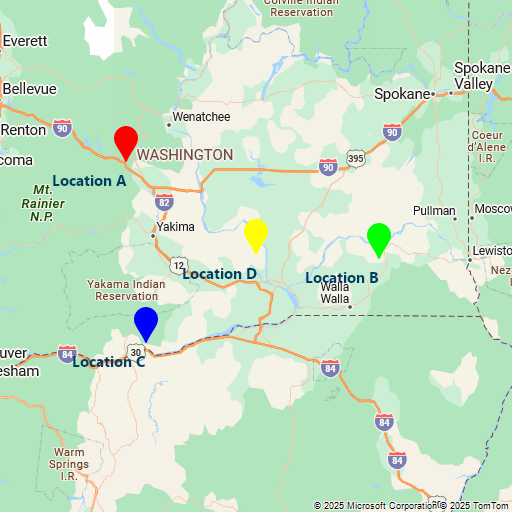

In [11]:
# Render the turbine locations on the map by calling the Azure Maps Get Map Image service
session = aiohttp.ClientSession()

# Create separate pin definitions with different colors
pin_a = "default|la-25+60|ls12|lc003C62|coFF0000||'Location A'{} {}".format(
    coords[1], coords[0])  # Red
pin_b = "default|la-25+60|ls12|lc003C62|co00FF00||'Location B'{} {}".format(
    coords[3], coords[2])  # Green
pin_c = "default|la-25+60|ls12|lc003C62|co0000FF||'Location C'{} {}".format(
    coords[5], coords[4])  # Blue
pin_d = "default|la-25+60|ls12|lc003C62|coFFFF00||'Location D'{} {}".format(
    coords[7], coords[6])  # Yellow

pins = "{}&pins={}&pins={}&pins={}".format(pin_a, pin_b, pin_c, pin_d)
image_response = "https://atlas.microsoft.com/map/static?subscription-key={}&api-version=2024-04-01&layer=basic&style=main&zoom=6&center={},{}&pins={}".format(
    subscription_key, coords[7], coords[6], pins)
static_map_response = await session.get(image_response)
poi_range_map = await static_map_response.content.read()

await session.close()

display(Image(poi_range_map, width=640, height=640))

In [12]:
# Group forecasted data for all locations
df = df.reset_index(drop=True)

# Create a list to store DataFrames, then concatenate once
forecast_dataframes = []

for i in range(len(station_ids)):
    loc_forecast = pd.DataFrame({
        'StationID': station_ids[i],
        'latitude': coords[0],
        'longitude': coords[1],
        'Year': years,
        'Month': months,
        'Day': days,
        'WindSpeed': wind_speeds[i],
        'WindDirection': wind_direction[i]
    })
    forecast_dataframes.append(loc_forecast)

# Concatenate all forecast data at once
forecast_data = pd.concat(forecast_dataframes, axis=0, ignore_index=True)
# Combine with existing data
combined_weather_data = pd.concat([df, forecast_data], ignore_index=True)
grouped_weather_data = combined_weather_data.groupby(['StationID'])
# Display data for first location
combined_weather_data[combined_weather_data['StationID']
                      == station_ids[0]].reset_index()

,index,StationID,latitude,longitude,Year,Month,Day,DryBulbCelsius,WetBulbFarenheit,WetBulbCelsius,DewPointFarenheit,DewPointCelsius,RelativeHumidity,WindSpeed,WindDirection
0,0,10397,47.149757,-120.805769,2019,11,9,14.0,56.0,13.2,55.0,13.0,93.0,6.0,230.0
1,1,10397,47.149757,-120.805769,2019,11,10,12.2,47.0,8.4,40.0,4.4,59.0,7.0,320.0
2,2,10397,47.149757,-120.805769,2019,11,11,10.6,40.0,4.5,25.0,-3.9,36.0,8.0,340.0
3,3,10397,47.149757,-120.805769,2019,11,12,8.3,46.0,7.5,44.0,6.7,89.0,15.0,80.0
4,4,10397,47.149757,-120.805769,2019,11,13,4.4,39.0,3.9,38.0,3.3,93.0,8.0,50.0
5,5,10397,47.149757,-120.805769,2019,11,14,10.0,44.0,6.4,36.0,2.2,59.0,5.0,330.0
6,6,10397,47.149757,-120.805769,2019,11,15,12.8,48.0,8.9,41.0,5.0,59.0,5.0,170.0
7,7,10397,47.149757,-120.805769,2019,11,16,16.7,55.0,12.7,49.0,9.4,63.0,6.0,180.0
8,8,10397,47.149757,-120.805769,2019,11,17,17.8,58.0,14.3,53.0,11.7,68.0,8.0,170.0
9,9,10397,47.149757,-120.805769,2019,11,18,18.9,62.0,16.5,59.0,15.0,78.0,6.0,180.0


In [13]:
combined_weather_data.describe()

,StationID,latitude,longitude,DryBulbCelsius,WetBulbFarenheit,WetBulbCelsius,DewPointFarenheit,DewPointCelsius,RelativeHumidity,WindSpeed,WindDirection
count,180.000000,180.000000,180.000000,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,180.000000,180.000000
mean,10387.250000,46.682930,-120.070531,7.635833,38.175000,3.37500,26.891667,-2.839167,52.858333,8.252222,207.266667
std,209.825596,0.516939,1.047057,7.548463,11.946423,6.59139,15.858511,8.814859,21.420282,5.154772,111.335047
min,10140.000000,45.779105,-120.805769,-9.400000,12.000000,-11.30000,-7.000000,-21.700000,10.000000,0.000000,0.000000
25%,10259.250000,46.419907,-120.805769,2.200000,29.750000,-1.32500,16.000000,-8.900000,40.500000,5.450000,130.000000
50%,10348.000000,46.799528,-120.700398,8.900000,39.500000,4.10000,25.000000,-3.900000,52.500000,7.400000,230.000000
75%,10476.000000,47.149757,-119.382765,13.925000,44.000000,6.65000,36.000000,2.200000,67.000000,10.000000,305.250000
max,10713.000000,47.149757,-118.028086,21.700000,64.000000,17.50000,61.000000,16.100000,96.000000,24.100000,360.000000


### Plots

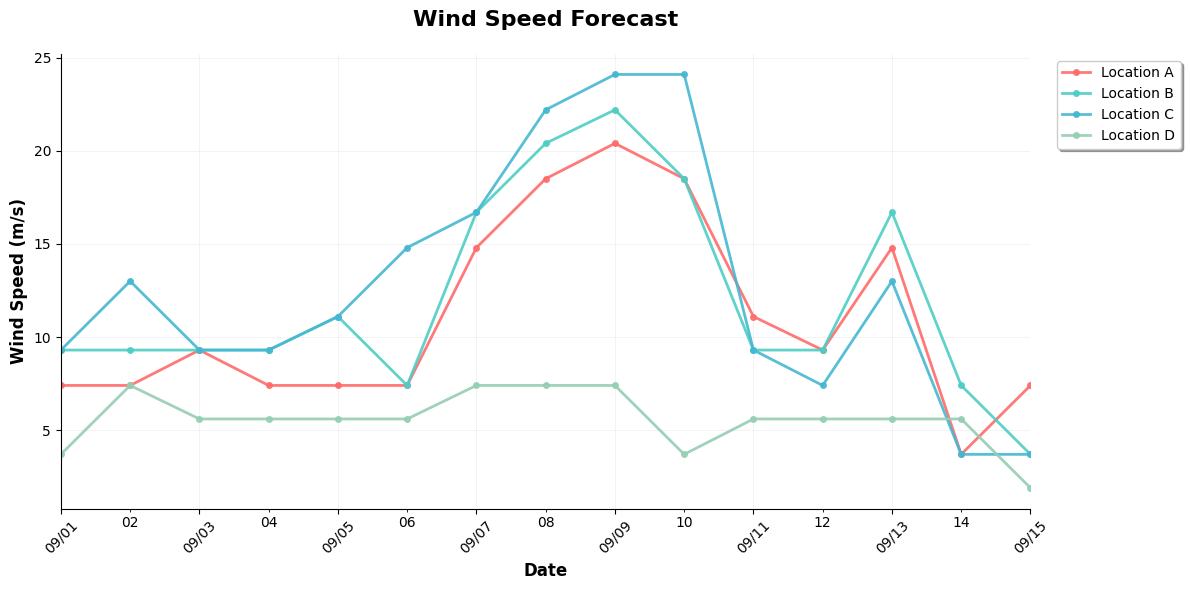

In [14]:
# Plot wind speed
curr_date = datetime.datetime.now().date()

windsPlot_df = pd.DataFrame({
    'Location A': wind_speeds[0],
    'Location B': wind_speeds[1],
    'Location C': wind_speeds[2],
    'Location D': wind_speeds[3]
}, index=pd.date_range(curr_date, periods=15))

# Create the plot with markers
windsPlot = windsPlot_df.plot.line(
    figsize=(12, 6),
    linewidth=2,
    marker='o',
    markersize=4,
    color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'],
    grid=True,
    alpha=0.9
)

# Enhanced formatting
windsPlot.set_xlabel("Date", fontsize=12, fontweight='bold')
windsPlot.set_ylabel("Wind Speed (m/s)", fontsize=12, fontweight='bold')
windsPlot.set_title("Wind Speed Forecast", fontsize=16,
                    fontweight='bold', pad=20)
windsPlot.grid(True, alpha=0.2, linestyle='-', linewidth=0.5)
windsPlot.set_axisbelow(True)
windsPlot.spines['top'].set_visible(False)
windsPlot.spines['right'].set_visible(False)

# Format dates on x-axis
windsPlot.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
windsPlot.xaxis.set_major_locator(mdates.DayLocator(interval=2))

windsPlot.legend(frameon=True, fancybox=True, shadow=True,
                 bbox_to_anchor=(1.02, 1), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()